In [114]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state=42)

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = [] # 평균손실값을 저장할 리스트. ift함수실행과 함께 자동생성
        
    def forpass(self, x): 
        z = np.sum(x * self.w) + self.b
        return z 
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) 
        return a
    
    def backprop(self, x, err):
        w_grad = -x * err
        b_grad = -1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(range(len(y)))
            # 모든샘플을 돌 때까지 가중치 절편을 업데이트하는데
            # 샘플을 뽑는 순서를 매 에포크마다 다르게 한다.
            for i in indexes:
                    z = self.forpass(x[i]) 
                    a = self.activation(z)
                    err = y[i] - a
                    w_grad, b_grad = self.backprop(x[i], err)
                    self.w = self.w - w_grad
                    self.b = self.b - b_grad
                    a = np.clip(a, 1e-10, 1-1e-10)
                    # a가 1이나 0이 되어버리면 솜실함숭안의 로그가 -무한이 되어버려
                    # 손실함수의 변화를 관찰할 수 없기 때문에 
                    # 1e-10 (10^-10), 1-1e-10 (1-10^-10) 으로 제한한다.
                    loss -= (y[i]*np.log(a)+(1-y[i])*np.log(1-a))
                    # 0이었던 loss는 샘플을 돌면서 값을 가지고
            self.losses.append(loss/len(y))
            # 위에서 합친 loss를 샘플 수로 나눠 평균으로 구하고 리스트에 담는다.
        return self.losses
        
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

In [119]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)
neuron.predict(x_test)

np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

In [94]:
neuron.losses

[8.754883970015818,
 5.212445368334512,
 4.807595242641099,
 4.453351382545701,
 5.465476697052013,
 4.0485012564886,
 4.149713787866492,
 4.301532585024255,
 4.301532585206095,
 3.593044865197159,
 4.554563913378056,
 3.491832333637426,
 3.3400135362978194,
 4.149713787684647,
 3.5930448646516266,
 2.732738347848624,
 3.036375941982297,
 3.2894072705179482,
 2.935163410422563,
 3.2388010047380824,
 2.9857696763842707,
 3.8966824589671427,
 2.985769676566127,
 3.0869822077621696,
 3.238801004738087,
 3.036375941800455,
 2.4797070193129773,
 3.188194738958213,
 3.4412260676757103,
 3.4918323334555823,
 2.8845571448245373,
 2.7833446132648003,
 3.542438598871755,
 2.682132081886909,
 3.238801004738083,
 2.935163410422565,
 3.036375941800453,
 2.3784944877532346,
 3.4412260674938597,
 3.036375941800456,
 3.390619801713998,
 2.9351634106044115,
 2.580919550327174,
 3.0363759419822993,
 2.9857696760205816,
 2.7327383476667855,
 2.88455714500639,
 3.4412260673120185,
 2.9857696760205816,
 2.

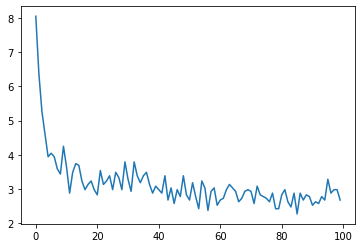

In [121]:
import matplotlib.pyplot as plt
plt.plot(neuron.losses)

In [139]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3)

sgd.fit(x_train, y_train)
print(sgd.score(x_test, y_test))

0.7807017543859649
